## Coding Exercise #0310

### 1. Classification with KNN:

In [1]:
# Se importan las bibliotecas necesarias para el análisis de datos, visualización y aprendizaje automático.
import numpy as np                         # Biblioteca para operaciones matemáticas y manejo de arrays.
import pandas as pd                        # Biblioteca para el manejo y análisis de datos estructurados (DataFrames).
import matplotlib.pyplot as plt            # Biblioteca para la creación de gráficos y visualización de datos.
import os                                  # Biblioteca para interactuar con el sistema operativo (por ejemplo, manejo de rutas de archivos).
import seaborn as sns                      # Biblioteca para visualización de datos más estética y avanzada que Matplotlib.
import warnings                            # Biblioteca para gestionar advertencias en la ejecución del código.

# Se importan herramientas específicas de scikit-learn para aprendizaje automático:
from sklearn.model_selection import train_test_split, GridSearchCV  
# train_test_split: divide los datos en conjuntos de entrenamiento y prueba.
# GridSearchCV: realiza la búsqueda de hiperparámetros óptimos mediante validación cruzada.

from sklearn.neighbors import KNeighborsClassifier  
# KNeighborsClassifier: implementa el algoritmo de clasificación basado en vecinos más cercanos (KNN).

from sklearn import metrics, preprocessing  
# metrics: contiene funciones para evaluar modelos (como precisión, recall, F1, etc.).
# preprocessing: incluye herramientas para preprocesar datos (normalización, escalado, codificación, etc.).

# Se desactivan las advertencias para evitar mensajes innecesarios durante la ejecución del código.
warnings.filterwarnings(action='ignore')

# Configuración para que los gráficos generados con Matplotlib se muestren directamente en el cuaderno de Jupyter.
%matplotlib inline


#### 1.1. Read in data:

The data and explanation can be found [here](https://www.kaggle.com/c/titanic/data) (requires sign in).

In [2]:
# Cambia la ruta a donde se encuentre el CSV
os.chdir("/Users/alemr/Developer/courses/Samsung-Innovation-Campus/resources/")

In [3]:
# Se lee el archivo CSV y se carga en una variable
df = pd.read_csv('data_titanic.csv', header='infer')

In [4]:
# Se muestra el numero de filas y columnas que tienen el dataset
df.shape

(891, 12)

In [5]:
# Se muestran los primeros 3 registros del dataset
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### 1.2. Missing value processing: 

In [6]:
# Se muestran los valores nulos por cada columna
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Fill the missing values in the Age variable.
# Se rellenan los valores faltantes en la variable Age.
n = df.shape[0]
Age = []                                                               # Una lista vacía para almacenar las edades.
for i in range(n):
    if np.isnan(df.Age[i]):
        if ('Mr' in df.Name[i]) or ('Mrs' in df.Name[i]) :
            Age.append(30)                                             # Si existe un 'Mr' or 'Mrs' en el nombre, entonces la edad es probablemente adulta. Por lo tanto, rellene con 30.
        else:
            Age.append(10)                                             # Si no existe ese patrón, entonces la edad es probablemente joven. Por lo tanto, rellene con 10.
    else:
        Age.append(df.Age[i])
df.Age = pd.Series(Age)                                               # Reemplace la columna Age con la nueva lista de edades.

In [8]:
# Se eliminan las columnas que no se utilizarán en el análisis.
df = df.drop(columns = ['PassengerId','Name','Ticket','Fare','Cabin'])
df.head(3)                                                           # Se muestran los primeros 3 registros del dataset.

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S


In [9]:
# Se eliminan los valores nulos restantes.
df=df.dropna(axis=0)

(889, 7)

In [10]:
# Se muestra el número de filas y columnas que tiene el dataset.
df.shape

(889, 7)

#### 1.3. Exploratory data analysis:

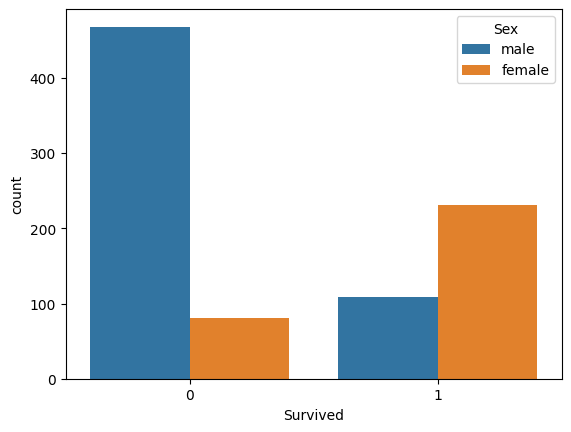

In [11]:
# La tabla de frecuencia de la variable Survived con respecto al Genero.
sns.countplot(x='Survived', hue="Sex", data=df)
plt.show()

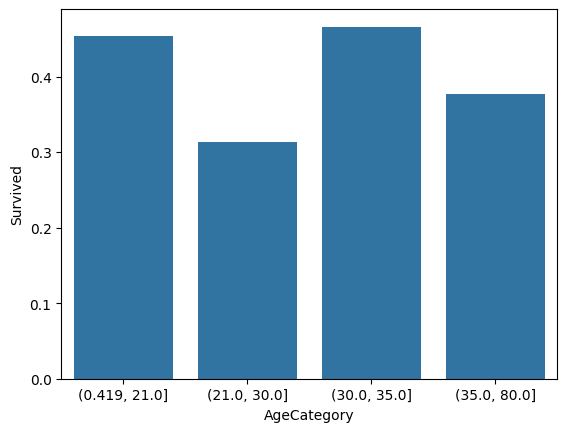

In [12]:
df['AgeCategory'] = pd.qcut(df.Age,4)                   # Se divide la variable Age en 4 categorías iguales.
sns.barplot(x='AgeCategory',y='Survived', ci=None, data=df) # Se muestra la tasa de supervivencia en cada categoría de edad.
plt.show()

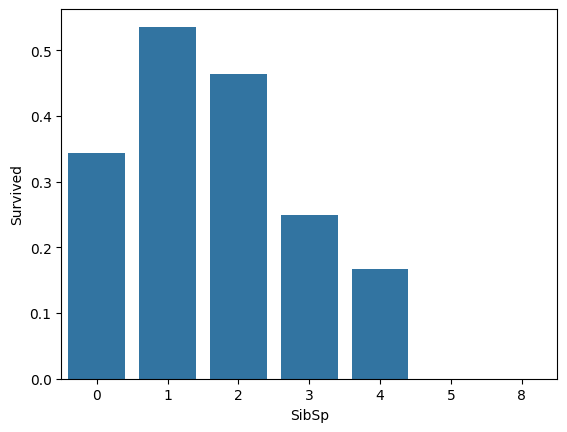

In [13]:
# Se muestra el indice de supervivencia con respecto a la variable SibSp (Hermanos o Parejas).
sns.barplot(x='SibSp', y='Survived', ci=None, data=df)
plt.show()

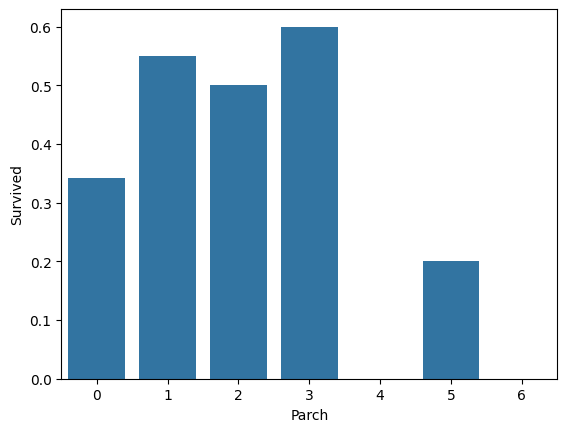

In [14]:
# Se muestra el indice de supervivencia con respecto a la variable Parch (Padres o Hijos)
sns.barplot(x='Parch', y='Survived', ci=None, data=df)
plt.show()

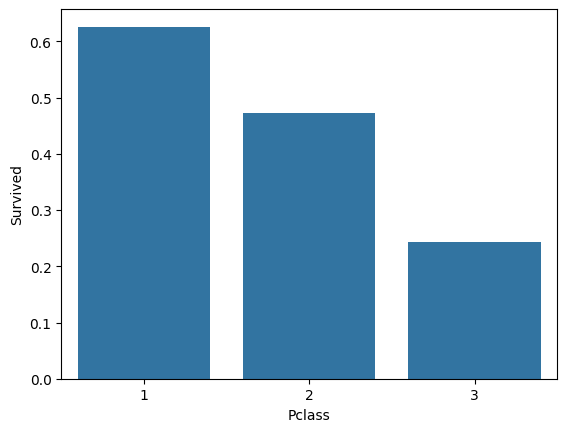

In [15]:
# Se muestra el indice de superviviencia con respecto a la variable Pclass (Clase de pasajero).
sns.barplot(x='Pclass', y='Survived', ci=None, data=df)
plt.show()

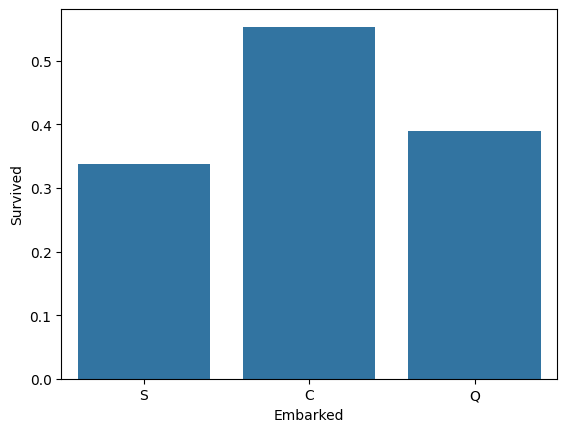

In [16]:
# Se muestra el indice de supervivencia con respecto a la variable Embarked (Puerto de embarque).
sns.barplot(x='Embarked', y='Survived', ci=None, data=df)
plt.show()

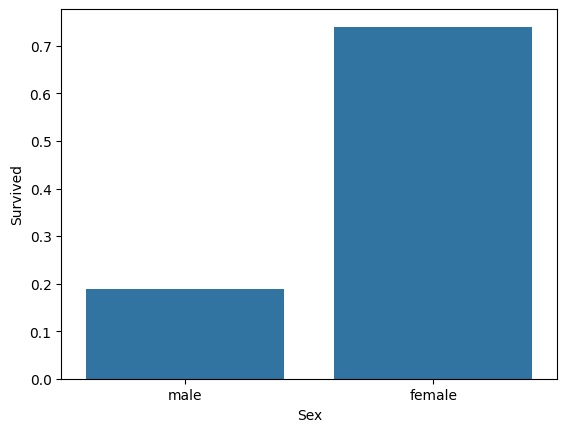

In [17]:
# Indice de supervivencia con respecto a la variable genero
sns.barplot(x='Sex', y='Survived', ci=None,  data=df)
plt.show()

#### 1.4. Feature engineering:

In [18]:
# Convertir en variables dummy y luego eliminar las variables originales
df = pd.get_dummies(df.AgeCategory, drop_first=True,prefix='Age').join(df.drop(columns=['Age','AgeCategory']))
df = pd.get_dummies(df.Pclass, drop_first=True,prefix='Pclass').join(df.drop(columns=['Pclass']))
df = pd.get_dummies(df.SibSp, drop_first=True,prefix='SibSp').join(df.drop(columns=['SibSp']))
df = pd.get_dummies(df.Parch, drop_first=True,prefix='Parch').join(df.drop(columns=['Parch']))
df = pd.get_dummies(df.Sex, drop_first=True,prefix='Sex').join(df.drop(columns=['Sex']))
df = pd.get_dummies(df.Embarked, drop_first=True,prefix='Embarked').join(df.drop(columns=['Embarked']))

# Se muestran los primeros 5 registros del dataset.
df.head(5)

,Embarked_Q,Embarked_S,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3,"Age_(21.0, 30.0]","Age_(30.0, 35.0]","Age_(35.0, 80.0]",Survived
0,False,True,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,0
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,1
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,1
3,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,1
4,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,0


In [19]:
# Se guarda el dataset preprocesado con variables dummy en un archivo CSV.
df.to_csv('data_titanic_2.csv',index=False)

#### 1.5. KNN train and test:

In [20]:
# Se definen las variables dependientes e independientes del modelo.
X = df.drop(columns=['Survived']) # Todos los atributos menos el de superviviencia 'Survived'
Y = df.Survived # Solo el atributo de superviviencia 'Survived' es la variable objetivo

In [21]:
# Se dividien los datos del dataset en prueba y entrenamiento
# Se asigna el 70% de los datos para entrenamiento y el 30% para prueba.
# Se establece una semilla aleatoria para reproducibilidad.
# Se asignan las variables X_train, X_test, Y_train, Y_test para los conjuntos de entrenamiento y prueba.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [22]:
# Se muestra la forma de los conjuntos de entrenamiento y prueba en las variables X y Y.
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(622, 20)
(267, 20)
(622,)
(267,)


In [23]:
knn5 = KNeighborsClassifier(n_neighbors=5) # Se instancia el modelo KNN con 5 vecinos.
knn5.fit(X_train, Y_train) # Se ajusta el modelo a los datos de entrenamiento. 
Y_pred = knn5.predict(X_test) # Se realizan predicciones con el modelo ajustado.
print(metrics.confusion_matrix(Y_test,Y_pred)) # Se muestra la matriz de confusión.
print("------------------------")
print( "Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3))) # Se muestra la precisión del modelo.

[[141  17]
 [ 36  73]]
------------------------
Accuracy : 0.801


In [24]:
knn100 = KNeighborsClassifier(n_neighbors=100) # Se instancia el modelo KNN con 100
knn100.fit(X_train, Y_train) # Se ajusta el modelo a los datos de entrenamiento.
Y_pred = knn100.predict(X_test) # Se realizan predicciones con el modelo ajustado.
print(metrics.confusion_matrix(Y_test,Y_pred)) # Se muestra la matriz de confusión.
print("------------------------")
print( "Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3))) # Se muestra la precisión del modelo.

[[157   1]
 [ 61  48]]
------------------------
Accuracy : 0.768


#### 1.6. KNN bias-Variance tradeoff as function of *k*: 

In [25]:
accs = [] # Lista vacía para almacenar las precisiones de los modelos.
k_grid = range(1,100,1) # Rango de valores de k a probar.
for k in k_grid: # Se realiza un bucle para probar cada valor de k.
    knn = KNeighborsClassifier(n_neighbors=k) # Se instancia el modelo KNN con k vec
    knn.fit(X_train, Y_train) # Se ajusta el modelo a los datos de entrenamiento.
    Y_pred = knn.predict(X_test) # Se realizan predicciones con el modelo ajustado.
    accs.append(metrics.accuracy_score(Y_test,Y_pred)) # Se almacena la precisión del modelo en la lista accs.

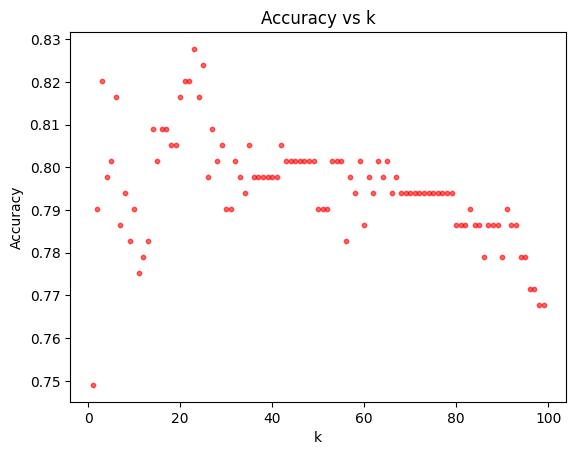

In [26]:
# Se grafica la precisión del modelo en función de k con la exactitud para cada K.
plt.scatter(k_grid,accs,c='red',marker='o',s=10,alpha=0.6)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

#### 1.7. KNN hyperparameter optimization:

In [27]:
# Se define una grilla de hiperparámetros para la búsqueda de cuadrícula.
k_grid = np.arange(1,51,1)
parameters = {'n_neighbors':k_grid}

In [28]:
# 'n-jobs' se usa para establecer uso de todos los nucleos del procesador
# Se realiza la búsqueda de cuadrícula con validación cruzada de 10 pliegues.
gridCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, n_jobs = -1)
gridCV.fit(X_train, Y_train)                                                        # Se ajusta la búsqueda de cuadrícula a los datos de entrenamiento.
best_k = gridCV.best_params_['n_neighbors']                                         # Se obtiene el mejor valor de k.
print("Best k : " + str(best_k))                                                    # Se muestra el mejor valor de k.

Best k : 37


In [29]:
# Teniendo el 'mejor k' se entrena el modelo con ese valor
KNN_best = KNeighborsClassifier(n_neighbors=best_k)
KNN_best.fit(X_train, Y_train) # Se ajusta el modelo a los datos de entrenamiento.
Y_pred = KNN_best.predict(X_test) # Se realizan predicciones con el modelo ajustado.
print( "Best Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3))) # Se muestra la precisión del modelo.

Best Accuracy : 0.798
